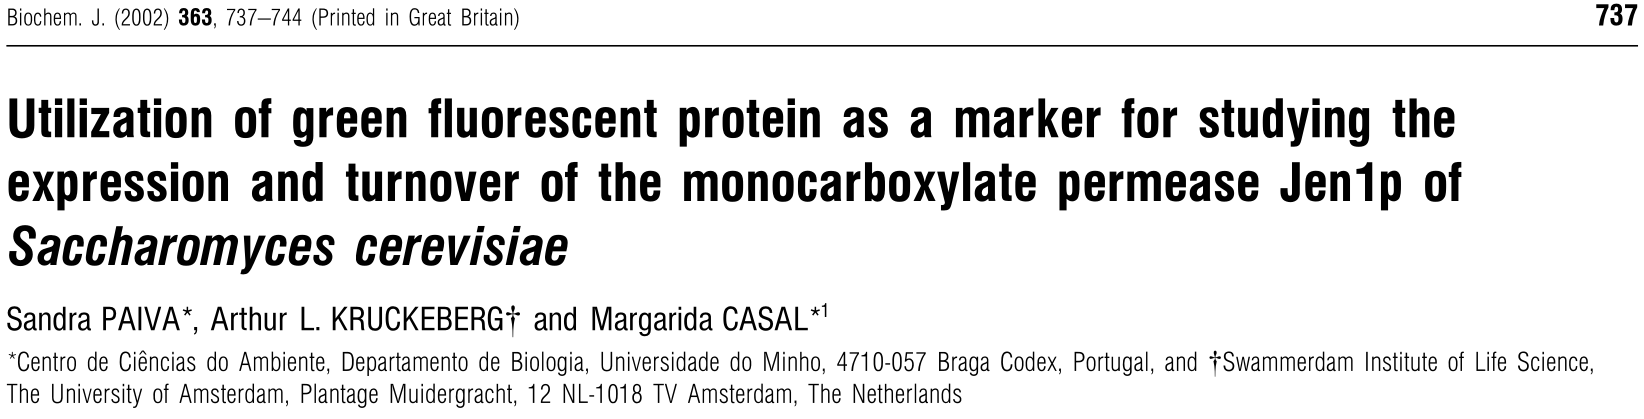

[link to paper](https://portlandpress.com/biochemj/article-abstract/363/3/737/40440/Utilization-of-green-fluorescent-protein-as-a?redirectedFrom=fulltext)

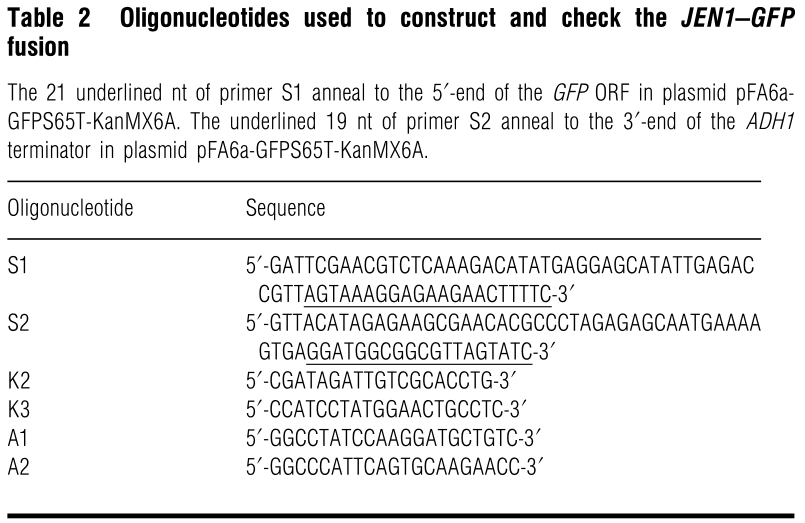

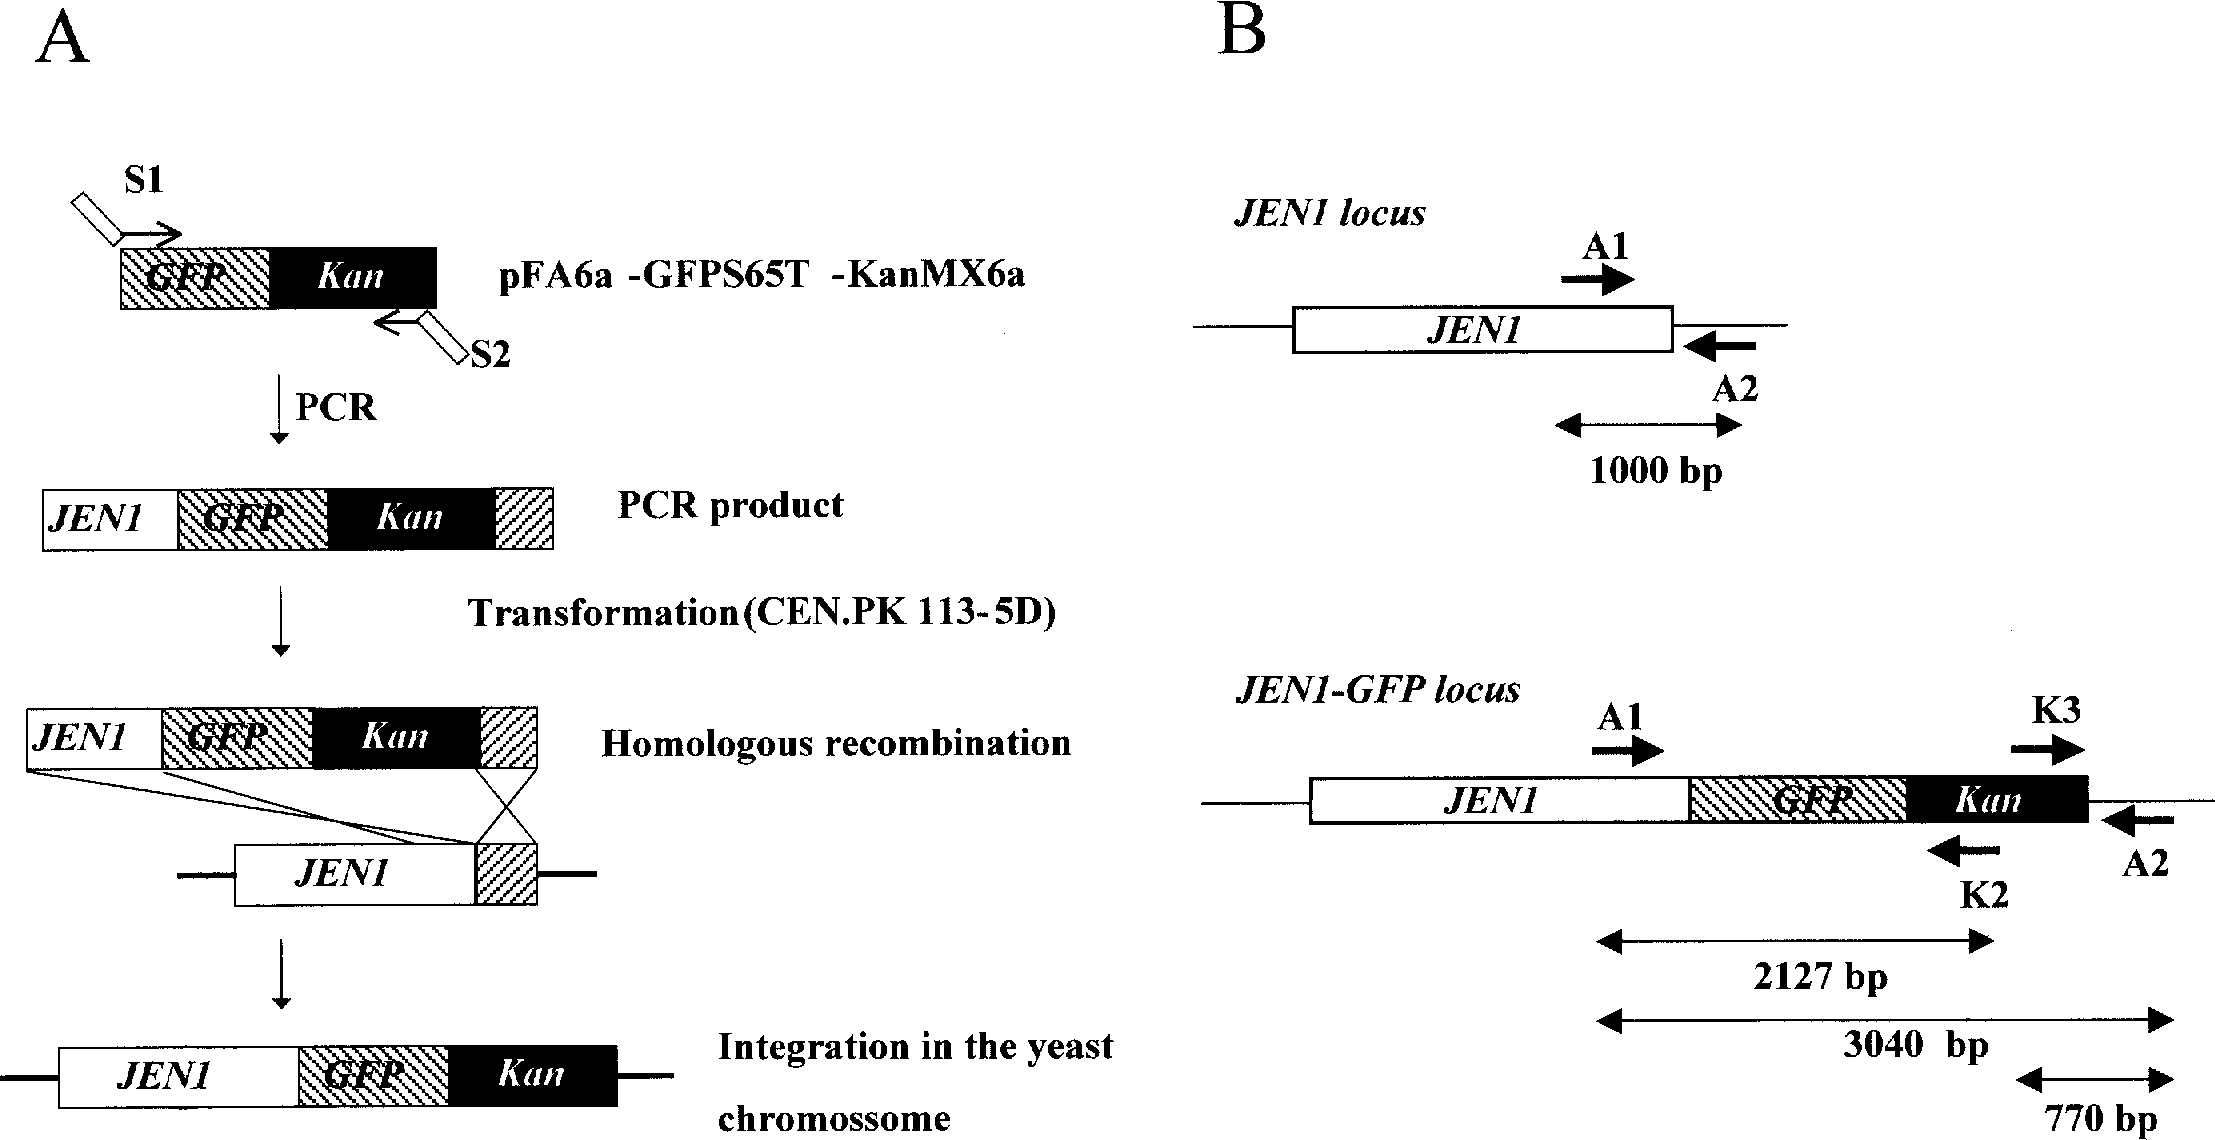

In [1]:
from pydna_utils.genbank import genbank
from pydna.parsers import parse_primers
from pydna.amplify import pcr
from pydna.assembly2 import homologous_recombination_integration

In [2]:
s1, s2, k2, k3, a1, a2 = parse_primers("""
>S1
GATTCGAACGTCTCAAAGACATATGAGGAGCATATTGAGACCGTTAGTAAAGGAGAAGAACTTTTC
>S2
GTTACATAGAGAAGCGAACACGCCCTAGAGAGCAATGAAAAGTGAGGATGGCGGCGTTAGTATC
>K2
CGATAGATTGTCGCACCTG
>K3
CCATCCTATGGAACTGCCTC
>Al
GGCCTATCCAAGGATGCTGTC
>A2
GGCCCATTCAGTGCAAGAACC
""")

In [3]:
template = genbank("AJ002682.1")
assert template.seguid() == 'ldseguid=zH5VDEw2UM9jjLVdEco_oZxzwss'

In [4]:
cassette = pcr(s1, s2, template)

In [5]:
locus = genbank("BK006944.2", 22234, 26159)
assert locus.seguid() == 'ldseguid=ZlCe_azWtYuHbKGWof0KX1LBlFs'

In [6]:
JEN1_GFP_locus, = homologous_recombination_integration(locus, [cassette])
assert JEN1_GFP_locus.seguid() == 'ldseguid=yNNY448oU9oK0PGj3lAJMMQgtLs'

In [7]:
JEN1_GFP_locus.name = "JEN1_GFP_locus"
JEN1_GFP_locus.stamp()
JEN1_GFP_locus.comment("""\
The S. cerevisiae JEN1 orf c-terminally tagged with GFP from pFA6a-GFPS65T-KanMX6.
""")

pydna ldseguid=yNNY448oU9oK0PGj3lAJMMQgtLs 2025-11-26T13:52:12
The S. cerevisiae JEN1 orf c-terminally tagged with GFP from pFA6a-GFPS65T-KanMX6.

In [8]:
print(JEN1_GFP_locus.format())

LOCUS       JEN1_GFP_locus          6305 bp    DNA     linear   UNK 01-JAN-1980
DEFINITION  description.
ACCESSION   id
VERSION     id
KEYWORDS    .
SOURCE      .
  ORGANISM  .
            .
COMMENT     pydna ldseguid=yNNY448oU9oK0PGj3lAJMMQgtLs 2025-11-26T13:52:12
            The S. cerevisiae JEN1 orf c-terminally tagged with GFP from
            pFA6a-GFPS65T-KanMX6.
FEATURES             Location/Qualifiers
     source          1849..2562
                     /organism="Aequorea victoria"
                     /mol_type="other DNA"
                     /db_xref="taxon:6100"
                     /note="GFP gene (green fluorescent protein)"
     source          2571..2799
                     /organism="Saccharomyces cerevisiae"
                     /mol_type="other DNA"
                     /db_xref="taxon:4932"
                     /note="Terminator of ADH1 (alcohol dehydrogenase) gene"
     source          2810..3212
                     /organism="Eremothecium gossypii"
           

In [9]:
pcr(a1, a2, locus) # 1000 bp

Amplicon(1060)

In [10]:
pcr(a1, k2, JEN1_GFP_locus) # 2127 bp

Amplicon(2116)

In [11]:
pcr(k3, a2, JEN1_GFP_locus) # 770 bp

Amplicon(760)

In [12]:
pcr(a1, a2, JEN1_GFP_locus) # 3040 bp

Amplicon(3439)